In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

# for CVXPY implementation
from solardatatools.signal_decompositions import tl1_l2d2p365 as cvx_sd

# for OSD implementation
from solardatatools.osd_signal_decompositions import tl1_l2d2p365 as osd_sd

# Import data from `tests/fixtures`

In [2]:
# Import data
fixtures_path = "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/tests/fixtures/"

data_file_path = Path(fixtures_path + "clear_day_detection/one_year_power_signals_1.csv")

with open(data_file_path) as file:
    data = np.loadtxt(file, delimiter=",")
expected_data_file_path = Path(fixtures_path + "clear_day_detection/one_year_weights_1.csv")

with open(expected_data_file_path) as file:
    expected_output = np.loadtxt(file, delimiter=",")

## Preprocess data to obtain metric

In [4]:
tc = np.linalg.norm(data[:-2] - 2 * data[1:-1] + data[2:], ord=1, axis=0)
# Normalize such that the maximum value is equal to one
tc /= np.nanmax(tc)
tc = 1 - tc

# Calculate the daily energy
de = np.sum(data, axis=0)

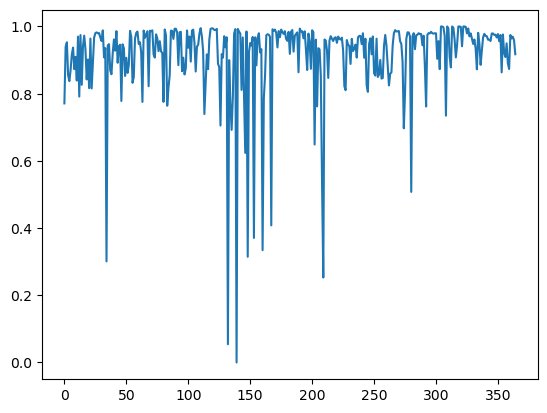

In [5]:
plt.plot(tc);

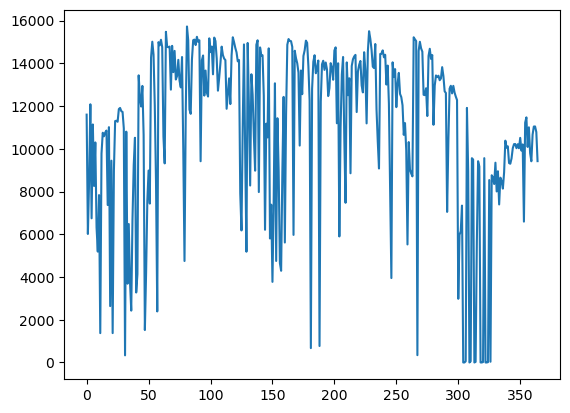

In [6]:
plt.plot(de);

# Run tests

## Compare CVXPY/OSD with identical weights

### With MOSEK/QSS

CVXPY objective       2.50590
OSD objective, scaled 2.50593
MAE (OSD,CVX)   4.68e-06


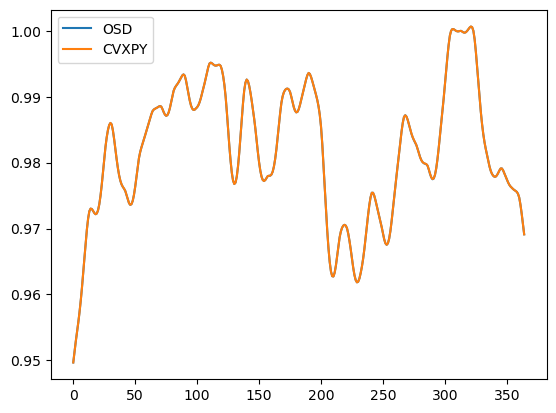

In [6]:
cvx_t1 = cvx_sd(tc, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t1 = osd_sd(tc, tau=0.9, w2=1e3, yearly_periodic=False, solver="QSS")

# get scaled obj from cvxpy
cvx_sd(tc, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t1)
print(f'MAE (OSD,CVX)   {mae(cvx_t1, osd_t1):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t1, label="OSD")
ax1.plot(cvx_t1, label="CVXPY")
ax1.legend()
plt.show()

CVXPY objective       140090.12891
OSD objective, scaled 140095.20302
MAE (OSD,CVX)   1.81e+01


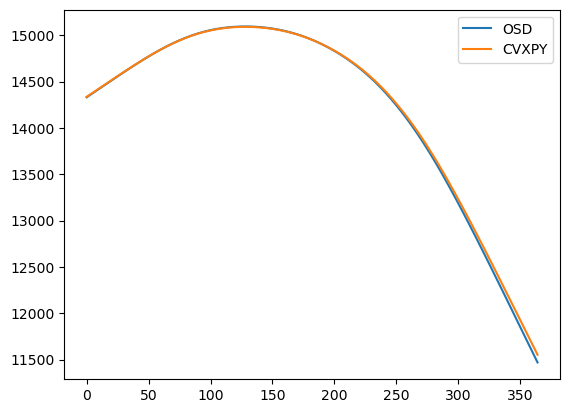

In [7]:
cvx_t1 = cvx_sd(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t1 = osd_sd(de, tau=0.9, w2=1e3, yearly_periodic=False, solver="QSS")

# get scaled obj from cvxpy
cvx_sd(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t1)
print(f'MAE (OSD,CVX)   {mae(cvx_t1, osd_t1):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t1, label="OSD")
ax1.plot(cvx_t1, label="CVXPY")
ax1.legend()
plt.show()

CVXPY objective       140090.12891
OSD objective, scaled 140090.12891
MAE (OSD,CVX)   1.29e-08


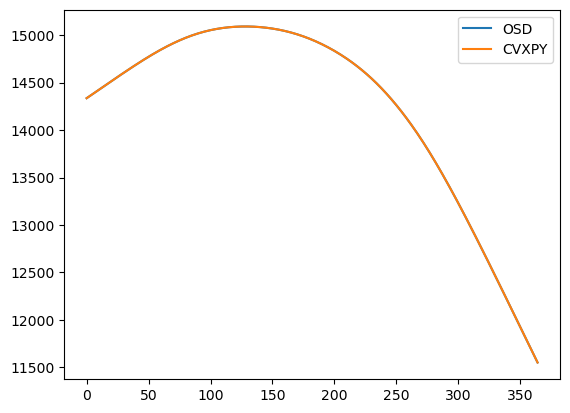

In [8]:
cvx_t1 = cvx_sd(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t1 = osd_sd(de, tau=0.9, w2=1e3, yearly_periodic=False, solver="MOSEK")

# get scaled obj from cvxpy
cvx_sd(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t1)
print(f'MAE (OSD,CVX)   {mae(cvx_t1, osd_t1):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t1, label="OSD")
ax1.plot(cvx_t1, label="CVXPY")
ax1.legend()
plt.show()

### With MOSEK/MOSEK

CVXPY objective       2.50590
OSD objective, scaled 2.50590
MAE (OSD,CVX)   1.82e-12


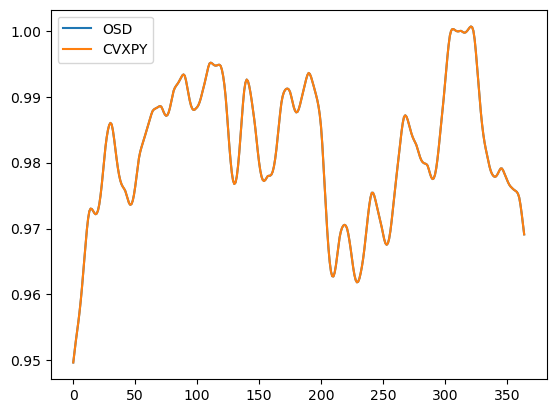

In [9]:
cvx_t1 = cvx_sd(tc, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t1 = osd_sd(tc, tau=0.9, w2=1e3, yearly_periodic=False, solver="MOSEK")

# get scaled obj from cvxpy
cvx_sd(tc, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t1)
print(f'MAE (OSD,CVX)   {mae(cvx_t1, osd_t1):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t1, label="OSD")
ax1.plot(cvx_t1, label="CVXPY")
ax1.legend()
plt.show()

CVXPY objective       140090.12891
OSD objective, scaled 140090.12891
MAE (OSD,CVX)   1.29e-08


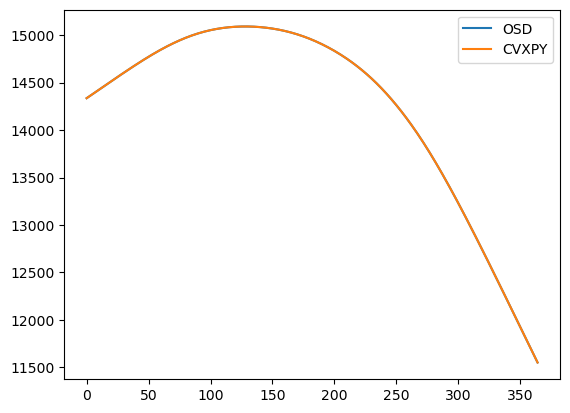

In [9]:
cvx_t1 = cvx_sd(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t1 = osd_sd(de, tau=0.9, w2=1e3, yearly_periodic=False, solver="MOSEK")

# get scaled obj from cvxpy
cvx_sd(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t1)
print(f'MAE (OSD,CVX)   {mae(cvx_t1, osd_t1):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t1, label="OSD")
ax1.plot(cvx_t1, label="CVXPY")
ax1.legend()
plt.show()

## Doubling length to make it 2 years

In [12]:
tc_long = np.array(list(tc) + list(tc))
de_long = np.array(list(de) + list(de))

### MOSEK/QSS

CVXPY objective       5.01786
OSD objective, scaled 5.01791
MAE (OSD,CVX)   4.34e-06


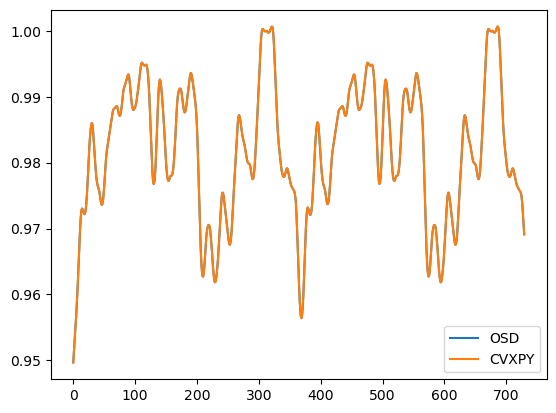

In [13]:
cvx_t2 = cvx_sd(tc_long, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t2 = osd_sd(tc_long, tau=0.9, w2=1e3, yearly_periodic=False, solver="QSS")

# get scaled obj from cvxpy
cvx_sd(tc_long, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t2)
print(f'MAE (OSD,CVX)   {mae(cvx_t2, osd_t2):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t2, label="OSD")
ax1.plot(cvx_t2, label="CVXPY")
ax1.legend()
plt.show()

CVXPY objective       287376.69197
OSD objective, scaled 287376.89142
MAE (OSD,CVX)   1.68e+00


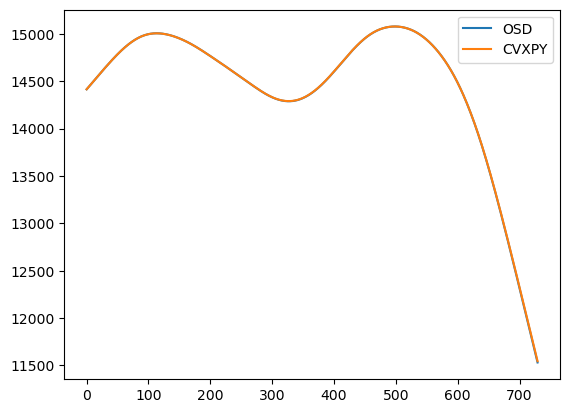

In [14]:
cvx_t2 = cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t2 = osd_sd(de_long, tau=0.9, w2=1e3, yearly_periodic=False, solver="QSS")

# get scaled obj from cvxpy
cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t2)
print(f'MAE (OSD,CVX)   {mae(cvx_t2, osd_t2):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t2, label="OSD")
ax1.plot(cvx_t2, label="CVXPY")
ax1.legend()
plt.show()

### MOSEK/MOSEK

CVXPY objective       287376.69197
OSD objective, scaled 287376.69197
MAE (OSD,CVX)   1.05e-08


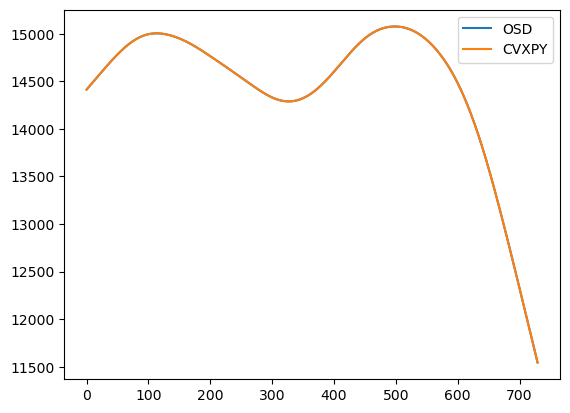

In [15]:
cvx_t2 = cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
osd_t2 = osd_sd(de_long, tau=0.9, w2=1e3, yearly_periodic=False, solver="MOSEK")

# get scaled obj from cvxpy
cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK", comp_osd=osd_t2)
print(f'MAE (OSD,CVX)   {mae(cvx_t2, osd_t2):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t2, label="OSD")
ax1.plot(cvx_t2, label="CVXPY")
ax1.legend()
plt.show()

### Adding periodicity

#### MOSEK/QSS

CVXPY objective       5.02357
OSD objective, scaled 5.02363
MAE (OSD,CVX)   4.01e-06


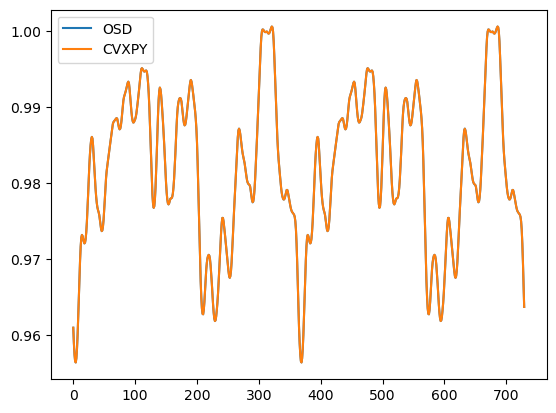

In [16]:
cvx_t2 = cvx_sd(tc_long, tau=0.9, c1=1e3, yearly_periodic=True, solver="MOSEK")
osd_t2 = osd_sd(tc_long, tau=0.9, w2=1e3, yearly_periodic=True, solver="QSS")

# get scaled obj from cvxpy
cvx_sd(tc_long, tau=0.9, c1=1e3, yearly_periodic=True, solver="MOSEK", comp_osd=osd_t2)
print(f'MAE (OSD,CVX)   {mae(cvx_t2, osd_t2):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t2, label="OSD")
ax1.plot(cvx_t2, label="CVXPY")
ax1.legend()
plt.show()

CVXPY objective       294300.94367
OSD objective, scaled 294301.06022
MAE (OSD,CVX)   1.44e-01


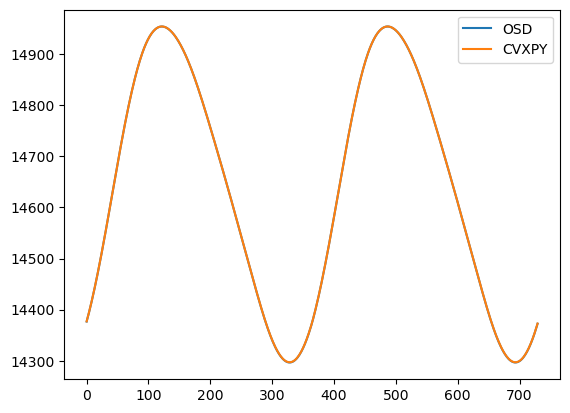

In [17]:
cvx_t2 = cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=True, solver="MOSEK")
osd_t2 = osd_sd(de_long, tau=0.9, w2=1e3, yearly_periodic=True, solver="QSS")

# get scaled obj from cvxpy
cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=True, solver="MOSEK", comp_osd=osd_t2)
print(f'MAE (OSD,CVX)   {mae(cvx_t2, osd_t2):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t2, label="OSD")
ax1.plot(cvx_t2, label="CVXPY")
ax1.legend()
plt.show()

#### MOSEK/MOSEK

CVXPY objective       294300.94367
OSD objective, scaled 294300.94367
MAE (OSD,CVX)   1.42e-09


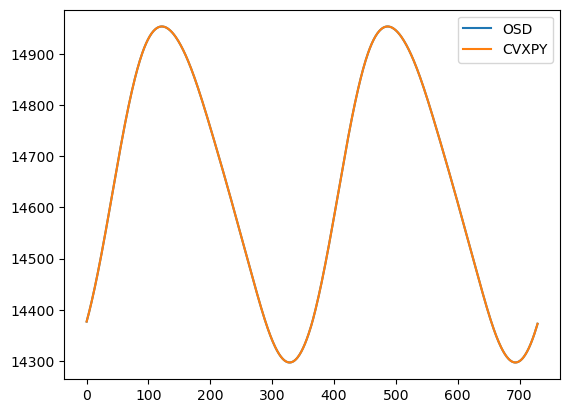

In [18]:
cvx_t2 = cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=True, solver="MOSEK")
osd_t2 = osd_sd(de_long, tau=0.9, w2=1e3, yearly_periodic=True, solver="MOSEK")

# get scaled obj from cvxpy
cvx_sd(de_long, tau=0.9, c1=1e3, yearly_periodic=True, solver="MOSEK", comp_osd=osd_t2)
print(f'MAE (OSD,CVX)   {mae(cvx_t2, osd_t2):.2e}')

f, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(osd_t2, label="OSD")
ax1.plot(cvx_t2, label="CVXPY")
ax1.legend()
plt.show()